# Day 5

## part 1

- input contains a set of ID ranges and a set of ID values
- ranges are inclusive
- IDs are spoiled if not in any range
- count the number of IDs which are not spoiled

In [76]:
import logging
from pathlib import Path

from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file,
    ParseConfig as PC,
    markdown,
)

log = logging.getLogger("advent")
logging.basicConfig(level=logging.INFO)


parser = PC("\n\n", PC("\n", str))
range_strings, id_strings = parse_from_file(Path("day_5.txt"), parser)

INFO:advent_of_code_utils.py:2 items loaded from "day_5.txt"


In [77]:
# my fancy parser isn't quite good enough to parse the 2 different types sets
ranges = [
    [int(value) for value in line.split('-')]
    for line in range_strings
]

ids = [int(value) for value in id_strings]

In [78]:
# as is tradition let's try and brute force first
fresh_count = 0
for id in ids:
    log.debug(f"{id=}")

    #preemptively increment fresh count...
    fresh_count += 1
    for low, high in ranges:
        # if in a range, leave early (so don't decrement)
        if low <= id <= high:
            log.debug(f"in [{low}, {high}]")
            break
    else:
        # else must've not been in any range so take it back
        fresh_count -= 1

markdown(f"{fresh_count=}")

fresh_count=720

## part 2

- find the total number of valid ingredient values

so I have an idea that should make this fairly simple
- sort all the low and high values of the ranges, ensuring we preserve whether they are low or high
- then go through each one in increasing value order with a counter
- if we hit a low value then add one to the counter at that value
- if we hit a high value then subtract one
- then we can easily extract a combined set of ranges since any set of values with a counter value of >= 1 is within at least one range

In [79]:
from dataclasses import dataclass

from matplotlib import pyplot as plt

In [80]:
@dataclass
class Point:
    value: int
    direction: int

# ranges = [
#     [3,5],
#     [10,14],
#     [16,20],
#     [12,18],
# ]

points = []
for low, high in ranges:
    points.append(Point(low, +1))
    points.append(Point(high, -1))

def get_value(point: Point):
    sort_value = point.value
    # ensure that a start and stop point at the same value are start < stop
    # this way single value ranges are counted
    # and contiguous ranges do not break for a single value
    if point.direction < 0:
        sort_value += 0.5
    return sort_value

sorted_points: list[Point] = sorted(points, key=get_value)
print(sorted_points[:3])


[Point(value=424358604270, direction=1), Point(value=4902201785270, direction=1), Point(value=7668845009584, direction=-1)]


In [81]:
counter = [0]
for point in sorted_points:
    counter.append(counter[-1] + point.direction)

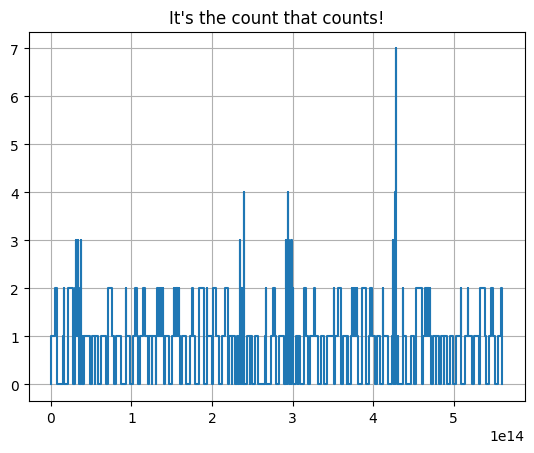

In [82]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title("It's the count that counts!")
ax.step([p.value for p in [sorted_points[0]] + sorted_points], counter, where="post")

In [83]:
# and just to check!
log.info(f"{counter[-1]=}")

INFO:advent:counter[-1]=0


In [84]:
# great so we do go back to 0 which would otherwise be a problem
# ok now to generate the combined ranges

combined = []
in_range = False
for count, point in zip(counter[1:] + [0], sorted_points):
    if not in_range and count == 1:
        in_range = True
        start = point.value
    elif in_range and count == 0:
        in_range = False
        stop = point.value
        combined.append([start, stop])
    # else do nothing

log.info(f"found {len(combined)} unique ranges")

INFO:advent:found 92 unique ranges


In [87]:
# great now this is trivial to solve!
total_ids = 0
for start, stop in combined:
    total_ids += (stop - start) + 1  # 3-5 -> 5-3=2 so +1 for 3 IDs
    assert (stop - start) >= 0, f"{start=}, {stop=}"  #  had some issues so just to be safe!
markdown(f"There are a total of {total_ids} possible fresh IDs!")

There are a total of 357608232770687 possible fresh IDs!